In [28]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [29]:
from pathlib import Path
img_path = Path('D:/March25/train_raw')
src = [p for p in img_path.glob('*.*.*.tif') if 'mask' not in str(p)]
print(src)

[WindowsPath('D:/March25/train_raw/2019.02.11.tif'), WindowsPath('D:/March25/train_raw/2019.10.02.tif'), WindowsPath('D:/March25/train_raw/2019.11.18.tif'), WindowsPath('D:/March25/train_raw/2019.11.20.tif'), WindowsPath('D:/March25/train_raw/2019.11.25.tif'), WindowsPath('D:/March25/train_raw/2019.11.29.tif'), WindowsPath('D:/March25/train_raw/2019.12.04.tif'), WindowsPath('D:/March25/train_raw/2019.12.09.tif'), WindowsPath('D:/March25/train_raw/2019.12.13.tif'), WindowsPath('D:/March25/train_raw/2019.12.17.tif'), WindowsPath('D:/March25/train_raw/2019.12.20.tif'), WindowsPath('D:/March25/train_raw/2019.12.23.tif'), WindowsPath('D:/March25/train_raw/2020.01.10.tif'), WindowsPath('D:/March25/train_raw/2020.01.16.tif'), WindowsPath('D:/March25/train_raw/2020.01.23.tif'), WindowsPath('D:/March25/train_raw/2020.01.27.tif'), WindowsPath('D:/March25/train_raw/2020.01.29.tif'), WindowsPath('D:/March25/train_raw/2020.02.07.tif'), WindowsPath('D:/March25/train_raw/2020.02.27.tif'), WindowsPath

D:/March25/train_raw\mask_2019.02.11.bmp
D:/March25/train_raw\2019.02.11.tif
(256, 256, 3) D:/March25/train_raw\2019.02.11.tif
(256, 256, 3) D:/March25/train_raw\2019.02.11.tif
(256, 256, 3) D:/March25/train_raw\2019.02.11.tif
(256, 256, 3) D:/March25/train_raw\2019.02.11.tif
(256, 256, 3) D:/March25/train_raw\2019.02.11.tif
(256, 256, 3) D:/March25/train_raw\2019.02.11.tif
(256, 256, 3) D:/March25/train_raw\2019.02.11.tif
D:/March25/train_raw\mask_2019.10.02.bmp
D:/March25/train_raw\2019.10.02.tif
(256, 256, 3) D:/March25/train_raw\2019.10.02.tif
(256, 256, 3) D:/March25/train_raw\2019.10.02.tif
(256, 256, 3) D:/March25/train_raw\2019.10.02.tif
(256, 256, 3) D:/March25/train_raw\2019.10.02.tif
(256, 256, 3) D:/March25/train_raw\2019.10.02.tif
(256, 256, 3) D:/March25/train_raw\2019.10.02.tif
(256, 256, 3) D:/March25/train_raw\2019.10.02.tif
D:/March25/train_raw\mask_2019.11.18.bmp
D:/March25/train_raw\2019.11.18.tif
(256, 256, 3) D:/March25/train_raw\2019.11.18.tif
(256, 256, 3) D:/Ma

(256, 256, 3) D:/March25/train_raw\2020.03.18.tif
(256, 256, 3) D:/March25/train_raw\2020.03.18.tif
(256, 256, 3) D:/March25/train_raw\2020.03.18.tif
(256, 256, 3) D:/March25/train_raw\2020.03.18.tif
(256, 256, 3) D:/March25/train_raw\2020.03.18.tif
(256, 256, 3) D:/March25/train_raw\2020.03.18.tif
(256, 256, 3) D:/March25/train_raw\2020.03.18.tif
D:/March25/train_raw\mask_2020.09.23.tif
D:/March25/train_raw\2020.09.23.tif
(256, 256, 3) D:/March25/train_raw\2020.09.23.tif
(256, 256, 3) D:/March25/train_raw\2020.09.23.tif
(256, 256, 3) D:/March25/train_raw\2020.09.23.tif
(256, 256, 3) D:/March25/train_raw\2020.09.23.tif
(256, 256, 3) D:/March25/train_raw\2020.09.23.tif
(256, 256, 3) D:/March25/train_raw\2020.09.23.tif
(256, 256, 3) D:/March25/train_raw\2020.09.23.tif
D:/March25/train_raw\mask_2020.09.25.bmp
D:/March25/train_raw\2020.09.25.tif
(256, 256, 3) D:/March25/train_raw\2020.09.25.tif
(256, 256, 3) D:/March25/train_raw\2020.09.25.tif
(256, 256, 3) D:/March25/train_raw\2020.09.25.

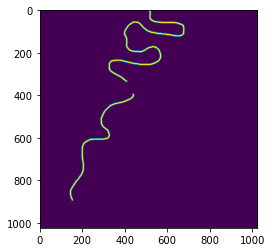

In [30]:
import os

train_path = 'D:/March25/train_raw'
output_path = 'C:/Users/Admin/Downloads/photos2WKR/new_data/'

num = 133
for path in src:
    mask_path = os.path.join(train_path, 'mask_{}'.format(path.name))
    
    if not os.path.exists(mask_path):
        mask_path = os.path.join(train_path, 'mask_{}.bmp'.format(path.stem))
    print(mask_path)
    
    original_path = os.path.join(train_path, path.name)
    print(original_path)
    
    img_source = cv.imread(original_path, cv.IMREAD_COLOR)[120:]
    
    img = cv.imread(mask_path, cv.IMREAD_COLOR)
    
    _, img_b = cv.threshold(img[..., 0], 254, 255, cv.THRESH_BINARY)
    
    img_b = img_b.T
    img_b = cv.flip(img_b, 0)[120:]
    plt.imshow(img_b, cmap='gray')
    
    k = 0
    plt.imshow(img_b[256:(1024 + 256), :1024])
    while k * 256 + 1024 < img_b.shape[0]:
        square = img_b[k*256: k*256 + 1024, :1024]
        source = img_source[k*256: k*256 + 1024, :1024]
        
        square = cv.resize(square, (256, 256))
        source = cv.resize(source, (256, 256))
        
        # square = cv.erode(square, np.ones((2, 2)))
        # square = cv.dilate(square, np.ones((2, 2)))
        # _, square = cv.threshold(square, 1, 255, cv.THRESH_BINARY)
        square = cv.cvtColor(square, cv.COLOR_GRAY2BGR)
        
        print(source.shape, original_path)
        cv.imwrite(os.path.join(output_path, 'masks/{}.jpg'.format(num)), square)
        cv.imwrite(os.path.join(output_path, 'cells/{}.jpg'.format(num)), source)
        k += 1
        num += 1
